# 비지도학습 과제
### 전처리 2차시에서 진행한 실습에서 이어지는 내용입니다.
### 2차시에서 최종적으로 저장한 hyundi_preprocessed.csv 파일을 활용해 비지도학습 클러스터링을 진행합니다.

### 파일 불러오기

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('hyundi_preprocessed.csv', index_col=0)

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


# 지금부터 df를 활용해 K-means Clustering을 진행하시면 됩니다.
* 다양한 클러스터를 만들며, 클러스터링에 익숙해지는 자유도 높은 과제 입니다.
* 비지도학습 K-means Clustering 강의 및 자료를 활용해 현대 중고차에 대한 클러스터링 분석을 자유롭게 진행해보세요.
* 분석을 위해 모든 열을 다 사용해도 되고, 몇 가지 열을 골라서 진행해도 됩니다!

In [4]:
# 분석을 진행할 열 3개를 가져옵니다.
df_new = df[['price','year','mileage']]

df_new

,price,year,mileage
0,7999,2017,17307
1,14499,2016,25233
2,11399,2016,37877
3,6499,2016,23789
4,10199,2015,33177
...,...,...,...
4854,29995,2019,1567
4856,7830,2015,59508
4857,6830,2017,13810
4858,13994,2018,23313


In [5]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 모델 생성
km = KMeans(n_clusters = 3,
            init='random',
            n_init=100,
            tol=1e-04,
            max_iter=500,
            random_state=0)

# 클러스터링 수행
y_km = km.fit_predict(df_new) # ****부분을 적절한 값으로 교체해주세ㅛㅇ.

# 클러스터링 결과 출력
df_new['cluster_label'] = y_km
print(df_new)

      price  year  mileage  cluster_label
0      7999  2017    17307              2
1     14499  2016    25233              1
2     11399  2016    37877              1
3      6499  2016    23789              1
4     10199  2015    33177              1
...     ...   ...      ...            ...
4854  29995  2019     1567              2
4856   7830  2015    59508              0
4857   6830  2017    13810              2
4858  13994  2018    23313              1
4859  15999  2016    11472              2

[4592 rows x 4 columns]


/var/folders/s5/z4h29rk50jlbht219d69t3b00000gn/T/ipykernel_6846/3075846715.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster_label'] = y_km


In [6]:
# 클러스터 중심점 확인
centers = km.cluster_centers_  # 중심을 확인하는 코드를 넣어주세요

centers

array([[ 8073.2875    ,  2013.98      , 60897.8575    ],
       [10720.04822955,  2016.3980464 , 30099.37728938],
       [14947.35160532,  2018.1174628 ,  9172.25176194]])

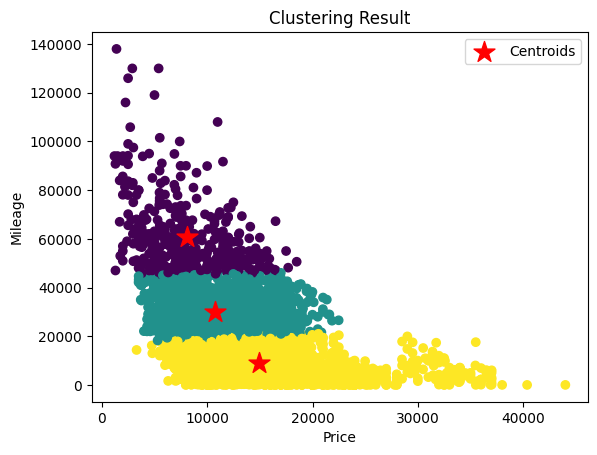

In [7]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(x =df_new['price'], y =df_new['mileage'], c=y_km, cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,2], marker='*', s=250, color='red', label='Centroids') # x,y에 값을 집어넣어주세요

plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()

# 아래부터는 배운 내용을 바탕으로 다양한 cluster 분석을 진행해주세요.

In [8]:
# Hierarchical Clustering

df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


In [9]:
from scipy.spatial.distance import pdist,squareform

# 범주형 변수 제거(PCA를 위해)
df_new1 = df.iloc[:,[1,2,4,6,7,8]]
df_new1

,year,price,mileage,tax,mpg,engineSize
0,2017,7999,17307,145.0,58.9,1.2
1,2016,14499,25233,235.0,43.5,2.0
2,2016,11399,37877,30.0,61.7,1.7
3,2016,6499,23789,20.0,60.1,1.0
4,2015,10199,33177,160.0,51.4,2.0
...,...,...,...,...,...,...
4854,2019,29995,1567,145.0,39.8,2.2
4856,2015,7830,59508,30.0,65.7,1.7
4857,2017,6830,13810,20.0,60.1,1.0
4858,2018,13994,23313,145.0,44.8,1.6


In [10]:
from sklearn.model_selection import train_test_split

X,y = df_new1.iloc[:,[0,2,3,4,5]] , df_new1.iloc[:,1]

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,
    random_state= 0 )

In [11]:
from sklearn.preprocessing import StandardScaler

# 표준화 진행

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
X_train_std

array([[ 0.95732077, -0.74296756,  0.3775381 , -1.73072132,  1.39406205],
       [ 0.4399458 , -0.77370243,  0.3775381 ,  0.63380274, -1.23411453],
       [ 1.47469574, -1.19867552,  0.46826015,  0.30766149, -1.23411453],
       ...,
       [-0.59480415, -0.35589309, -1.70906911,  0.40731576, -0.70847921],
       [ 1.47469574, -1.21878029,  0.3775381 ,  0.30766149, -1.23411453],
       [ 0.4399458 , -0.7689651 ,  0.3775381 , -0.75229757,  0.34279142]])

In [13]:
X_test_std

array([[-0.59480415,  1.03312651,  0.3775381 ,  0.10835295,  1.39406205],
       [ 0.95732077, -1.21895361,  0.3775381 , -1.20527153,  1.91969736],
       [-1.62955409, -0.46906904, -1.70906911,  0.40731576, -0.70847921],
       ...,
       [ 0.4399458 , -0.488365  ,  0.3775381 ,  0.63380274, -1.23411453],
       [-1.62955409,  1.49518943, -1.89051321,  0.63380274, -1.23411453],
       [-3.18167901,  3.14845958,  0.3775381 , -0.39897788,  0.60560908]])

In [14]:
cov_mat = np.cov(X_train_std.T)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([1.98062243, 1.51443328, 0.25794185, 0.67127322, 0.57728539])

In [15]:
eigen_vecs.shape

(5, 5)

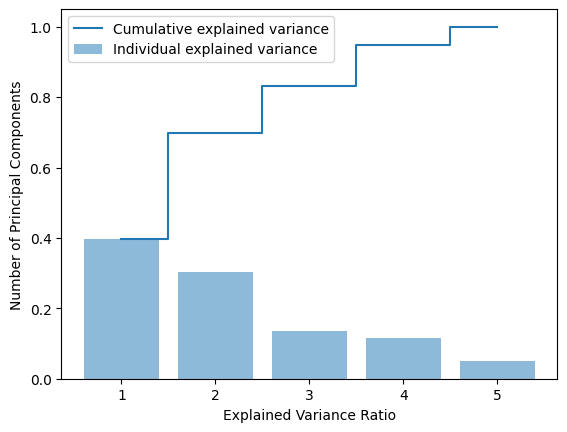

In [16]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,6),var_exp,alpha=0.5,align='center',
       label='Individual explained variance')
plt.step(range(1,6),cum_var_exp,where='mid',
        label='Cumulative explained variance')
plt.xlabel('Explained Variance Ratio')
plt.ylabel('Number of Principal Components')
plt.legend(loc='best')
plt.show()

In [17]:
# 2개의 features를 선택!

In [18]:
eigen_vals

array([1.98062243, 1.51443328, 0.25794185, 0.67127322, 0.57728539])

In [19]:
eigen_vecs

array([[-0.57479597,  0.32132446,  0.67878846, -0.32217332, -0.04255313],
       [ 0.53970092, -0.42826369,  0.70516909,  0.11212903, -0.12440563],
       [-0.4441145 , -0.38192149, -0.07581321,  0.34787613, -0.72810222],
       [ 0.41020712,  0.42932982, -0.1029229 , -0.43187697, -0.67104038],
       [-0.11324726, -0.61899329, -0.16013124, -0.75900983,  0.04779582]])

In [20]:
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(5)]
eigen_pairs

[(1.9806224346466366,
  array([-0.57479597,  0.53970092, -0.4441145 ,  0.41020712, -0.11324726])),
 (1.514433281932795,
  array([ 0.32132446, -0.42826369, -0.38192149,  0.42932982, -0.61899329])),
 (0.25794184675677145,
  array([ 0.67878846,  0.70516909, -0.07581321, -0.1029229 , -0.16013124])),
 (0.6712732215808291,
  array([-0.32217332,  0.11212903,  0.34787613, -0.43187697, -0.75900983])),
 (0.5772853931097354,
  array([-0.04255313, -0.12440563, -0.72810222, -0.67104038,  0.04779582]))]

In [21]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs
# np.abs(eigen_vals[i])을 기준으로 내림차순내림차순

[(1.9806224346466366,
  array([-0.57479597,  0.53970092, -0.4441145 ,  0.41020712, -0.11324726])),
 (1.514433281932795,
  array([ 0.32132446, -0.42826369, -0.38192149,  0.42932982, -0.61899329])),
 (0.6712732215808291,
  array([-0.32217332,  0.11212903,  0.34787613, -0.43187697, -0.75900983])),
 (0.5772853931097354,
  array([-0.04255313, -0.12440563, -0.72810222, -0.67104038,  0.04779582])),
 (0.25794184675677145,
  array([ 0.67878846,  0.70516909, -0.07581321, -0.1029229 , -0.16013124]))]

### X = Z * W

In [38]:
# eigen_pairs[0][1][:,np.newaxis]
# np.newaxis는 새로운 축을 추가함
# eigen_pairs[0][1].shape -> (5,)
# eigen_pairs[0][1][:,np.newaxis].shape -> (5,1)

In [23]:
eigen_pairs[0][1][:,np.newaxis]

array([[-0.57479597],
       [ 0.53970092],
       [-0.4441145 ],
       [ 0.41020712],
       [-0.11324726]])

In [24]:
eigen_pairs[1][1][:,np.newaxis]

array([[ 0.32132446],
       [-0.42826369],
       [-0.38192149],
       [ 0.42932982],
       [-0.61899329]])

In [40]:
W = np.hstack((eigen_pairs[0][1][:,np.newaxis],
              eigen_pairs[1][1][:,np.newaxis]))

# hstack : 가로로 행렬 결합

W

array([[-0.57479597,  0.32132446],
       [ 0.53970092, -0.42826369],
       [-0.4441145 , -0.38192149],
       [ 0.41020712,  0.42932982],
       [-0.11324726, -0.61899329]])

In [26]:
X_train_std[0]

array([ 0.95732077, -0.74296756,  0.3775381 , -1.73072132,  1.39406205])

In [27]:
X_train_pca = X_train_std.dot(W)

In [28]:
X_train_pca

array([[-1.98674245, -1.12435863],
       [-0.43836665,  1.36454311],
       [-1.43657156,  1.70436326],
       ...,
       [ 1.15615472,  1.22743786],
       [-1.40713114,  1.7476221 ],
       [-1.18297839, -0.20867411]])

In [29]:
km = KMeans(n_clusters=3,
               init='random',
                n_init=100,
                tol=1e-04,
                max_iter=500,
                random_state=0)
y_km = km.fit_predict(X_train_pca)
y_km

array([2, 1, 1, ..., 0, 1, 2], dtype=int32)

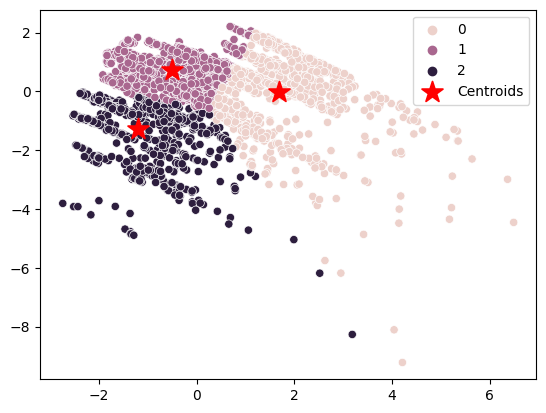

In [30]:
import seaborn as sns

sns.scatterplot(x=X_train_pca[:,0],y=X_train_pca[:,1],hue=y_km)
sns.scatterplot(x=km.cluster_centers_[:,0],
               y=km.cluster_centers_[:,1],s=250,edgecolor='red',
               c='red',marker='*',label='Centroids')
plt.show()